In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

In [87]:
plt.style.use("default")
sns.set_theme(
    context="paper",
    style="white",
    palette="tab10",
    font="serif",
    font_scale=2.5,
    color_codes=True,
    rc={"text.usetex": True},
)

In [88]:
# Load the data
data_dir = "../output/logistic_sweep/"

metric_files = glob(data_dir + "*metrics.txt")

metric_arrays = [np.loadtxt(f, delimiter=",") for f in metric_files]

result_files = glob(data_dir + "*results.txt")

result_arrays = [np.loadtxt(f, delimiter=",") for f in result_files]

In [89]:
metric_arrays[0].shape

(40, 4)

In [90]:
# separate metric arrays list into a, loss, accuracy, gradient norm numpy arrays
a_arrays = [a[:, 0] for a in metric_arrays]
loss_arrays = [a[:, 1] for a in metric_arrays]
accuracy_arrays = [a[:, 2] for a in metric_arrays]
grad_norm_arrays = [a[:, 3] for a in metric_arrays]

In [91]:
a = a_arrays[0]

In [92]:
loss = np.stack(loss_arrays, axis=1)
accuracy = np.stack(accuracy_arrays, axis=1)
grad_norm = np.stack(grad_norm_arrays, axis=1)

In [93]:
loss.shape

(40, 6)

In [94]:
gates = [
    file_name.split("/")[-1].split(".")[0].split("_")[0] for file_name in metric_files
]

In [95]:
gates

['AND', 'XNOR', 'XOR', 'NAND', 'OR', 'NOR']

In [96]:
a.shape

(40,)

In [97]:
for i in range(0, len(a), 13):
    print(i, a[i])

0 0.0
13 1.3333333730697632
26 2.6666667461395264
39 4.0


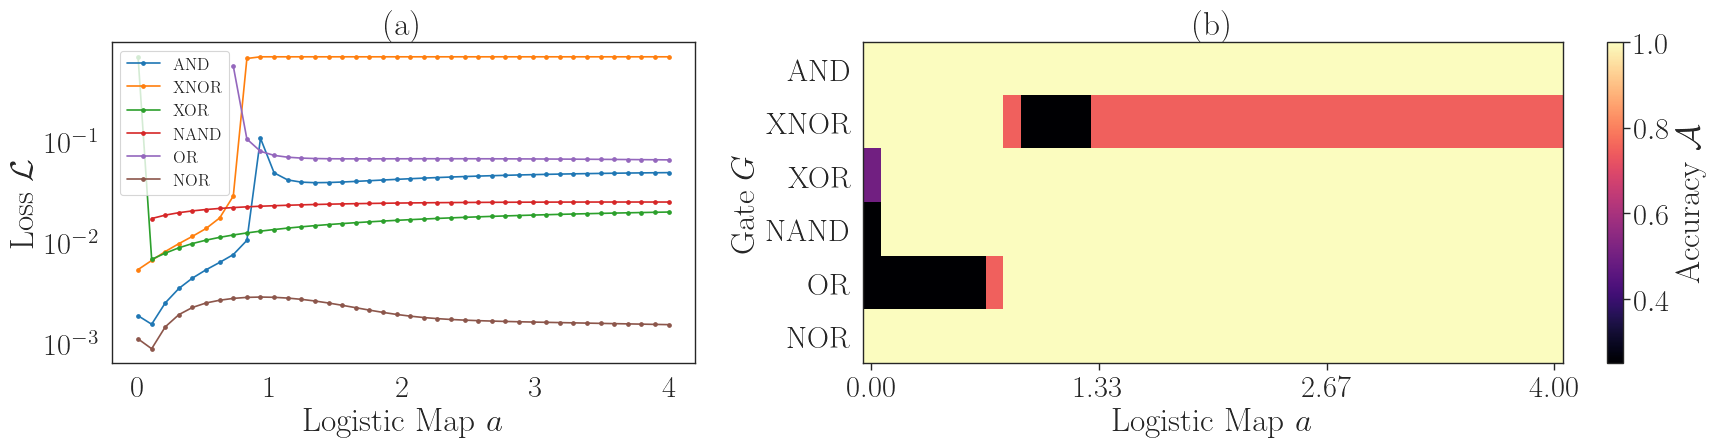

In [102]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5])

# Loss plot on the left
ax0 = plt.subplot(gs[0])
for i, data in enumerate(metric_arrays):
    ax0.plot(data[:, 0], data[:, 1], ".-", label=gates[i])
ax0.set_yscale("log")
ax0.set_xlabel("Logistic Map $a$")
ax0.set_ylabel("Loss $\\mathcal{L}$")
ax0.legend(fontsize=12)
ax0.set_title("(a)")

# Accuracy matrix on the right
ax1 = plt.subplot(gs[1])
cax = ax1.matshow(accuracy.T, aspect="auto", cmap="magma")
fig.colorbar(cax, ax=ax1, label="Accuracy $\\mathcal{A}$")
ax1.set_xlabel("Logistic Map $a$")
ax1.xaxis.set_ticks_position("bottom")
ax1.xaxis.set_label_position("bottom")
ax1.set_xticks(range(0, len(a), 13))
ax1.set_xticklabels([f"{val:.2f}" for val in a[::13]])
ax1.set_ylabel("Gate $G$")
ax1.set_yticks(range(len(gates)))
ax1.set_yticklabels(gates)
ax1.set_title("(b)")
plt.tight_layout()
# plt.savefig("../figures/logistic_sweep.pdf")
# plt.savefig("../figures/logistic_sweep.png")
# plt.savefig("../figures/logistic_sweep.svg")
plt.show()


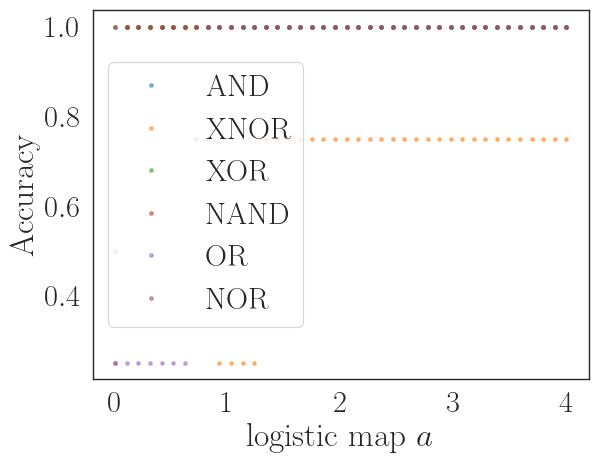

In [99]:
# Plot the data
fig, ax = plt.subplots()
for i, data in enumerate(metric_arrays):
    ax.plot(data[:, 0], data[:, 2], ".", label=gates[i], alpha=0.5)

ax.set_xlabel("logistic map $a$ ")

ax.set_ylabel("Accuracy")
ax.legend()

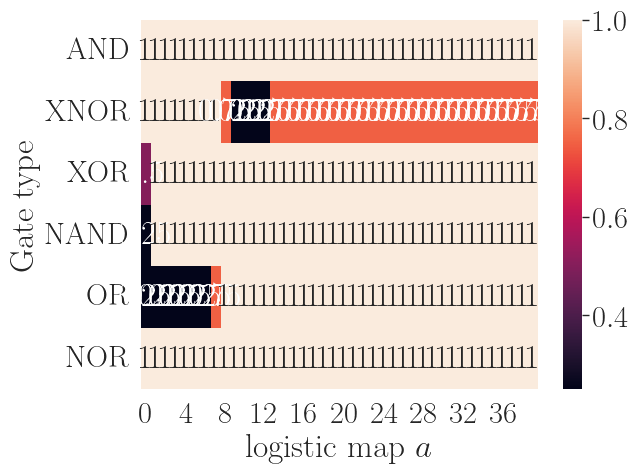

In [100]:
# represent as a heatmap where y axis is gate type
fig, ax = plt.subplots()
sns.heatmap(
    np.array([data[:, 2] for data in metric_arrays]), annot=True, yticklabels=gates
)
ax.set_xlabel("logistic map $a$ ")
ax.set_ylabel("Gate type")
plt.show()